In [133]:
import matplotlib.pyplot as plt
from keras.models import load_model
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import tensorflow as tf
import seaborn as sns
from keras.preprocessing import image
import os
import cv2

In [21]:
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)


In [22]:
test_set_path = r"C:\Users\BrunoLuciano\OneDrive - ITS Angelo Rizzoli\Documents\Deep_learning_project\Data\Test_set"
model_path = r'C:\Users\BrunoLuciano\OneDrive - ITS Angelo Rizzoli\Documents\Deep_learning_project\model\lego.keras'

In [23]:
image_size = (300, 300)
batch_size = 32

In [24]:
 
datagen_2 = ImageDataGenerator(rescale=1./255)   

In [25]:
test_set = datagen_2.flow_from_directory(
        directory=test_set_path,
        class_mode='categorical',
        color_mode="grayscale",
        target_size=image_size,
        batch_size=batch_size,
        shuffle=False,
        seed=42,
        interpolation="bilinear"
    )
    

Found 12000 images belonging to 50 classes.


In [26]:
model = load_model(model_path)

In [27]:

y_hat_pre = model.predict(test_set)
y_hat = np.argmax(y_hat_pre, axis=1)

y_true = test_set.classes

loss, accuracy = model.evaluate(test_set)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

375/375 [==============================] - 179s 476ms/step - loss: 1.2565 - accuracy: 0.5758
Loss: 1.2565363645553589
Accuracy: 0.5758333206176758


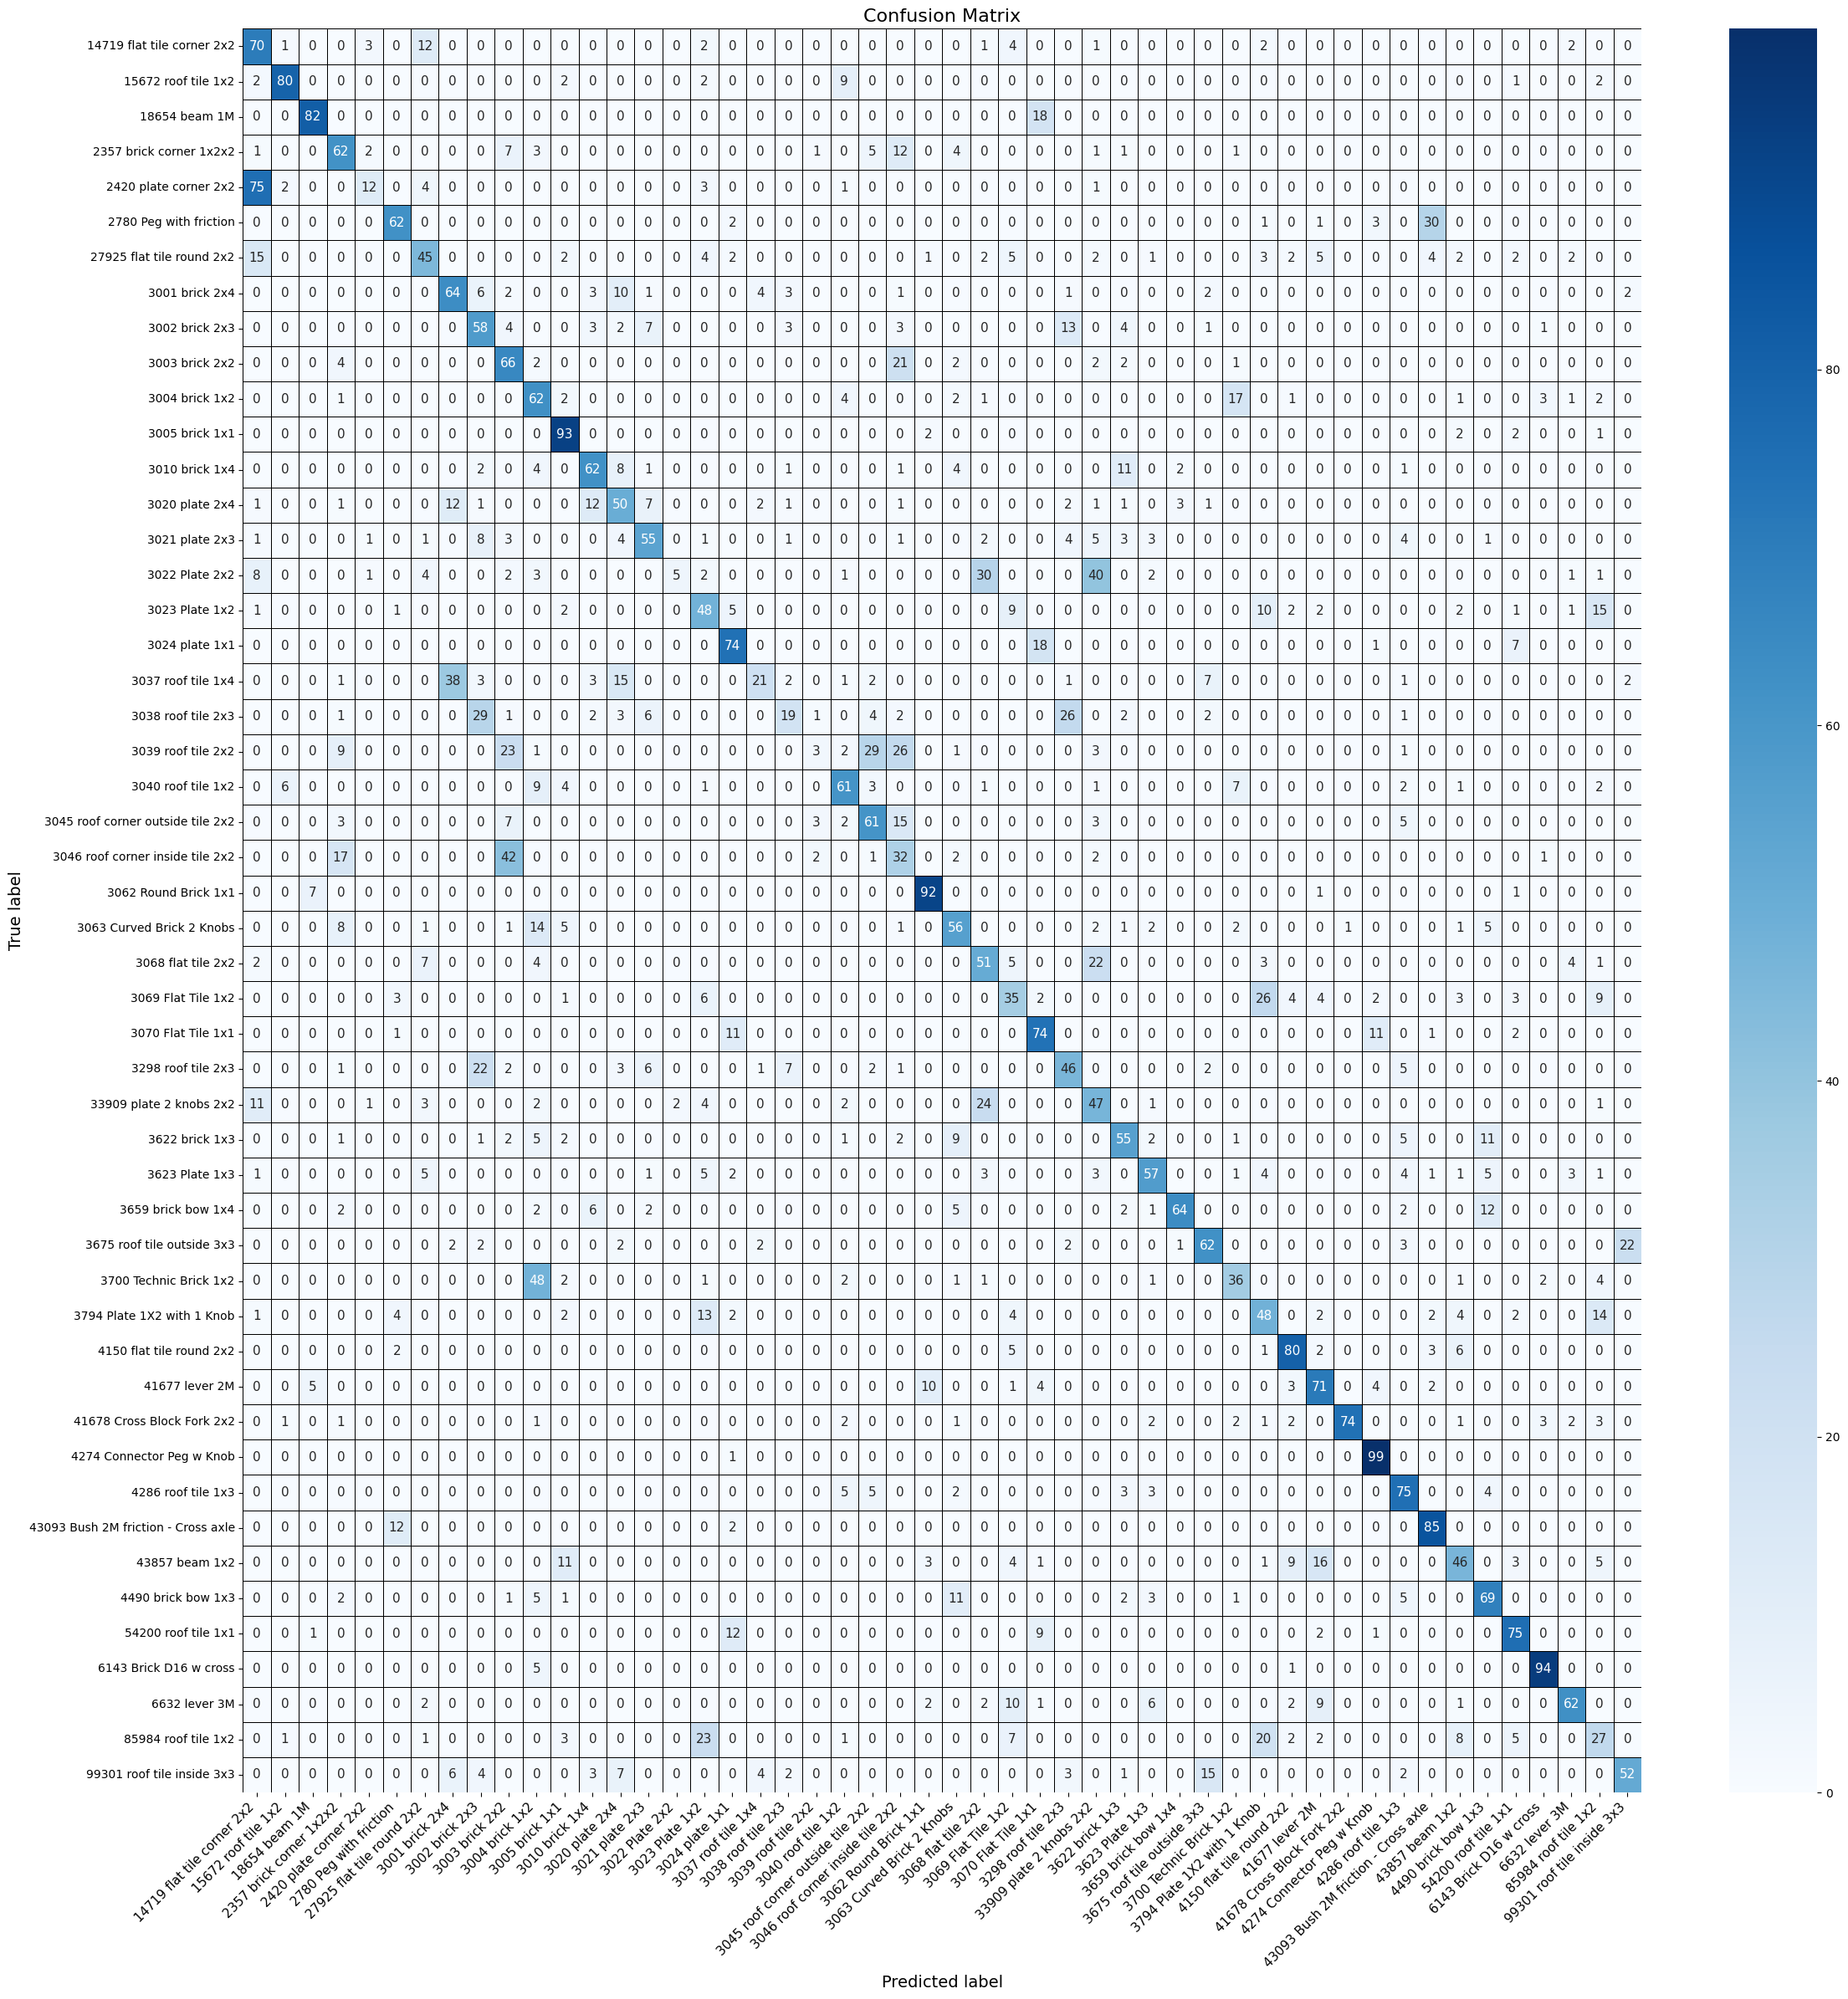

In [112]:

# Calcola la matrice di confusione
cm = confusion_matrix(y_true, y_hat)

# Normalizza la matrice di confusione
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Moltiplicare ogni numero per 100 per ottenere le percentuali
cm_percent = cm_normalized * 100

# Etichette delle classi
class_labels = list(test_set.class_indices.keys())


# Crea la heatmap
plt.figure(figsize=(24, 24))
ax = sns.heatmap(cm_percent, annot=True, cmap='Blues', xticklabels=class_labels, yticklabels=class_labels,
                fmt='.0f', annot_kws={"size": 11}, linewidths=0.5, linecolor='black')

# Impostazioni per migliorare la leggibilità delle etichette sull'asse x
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=11, horizontalalignment='right')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=10)

plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.title('Confusion Matrix', fontsize=16)
plt.tight_layout()
plt.show()




In [113]:
images, true_labels = next(test_set)


In [114]:

num_images = min(len(images), 20)

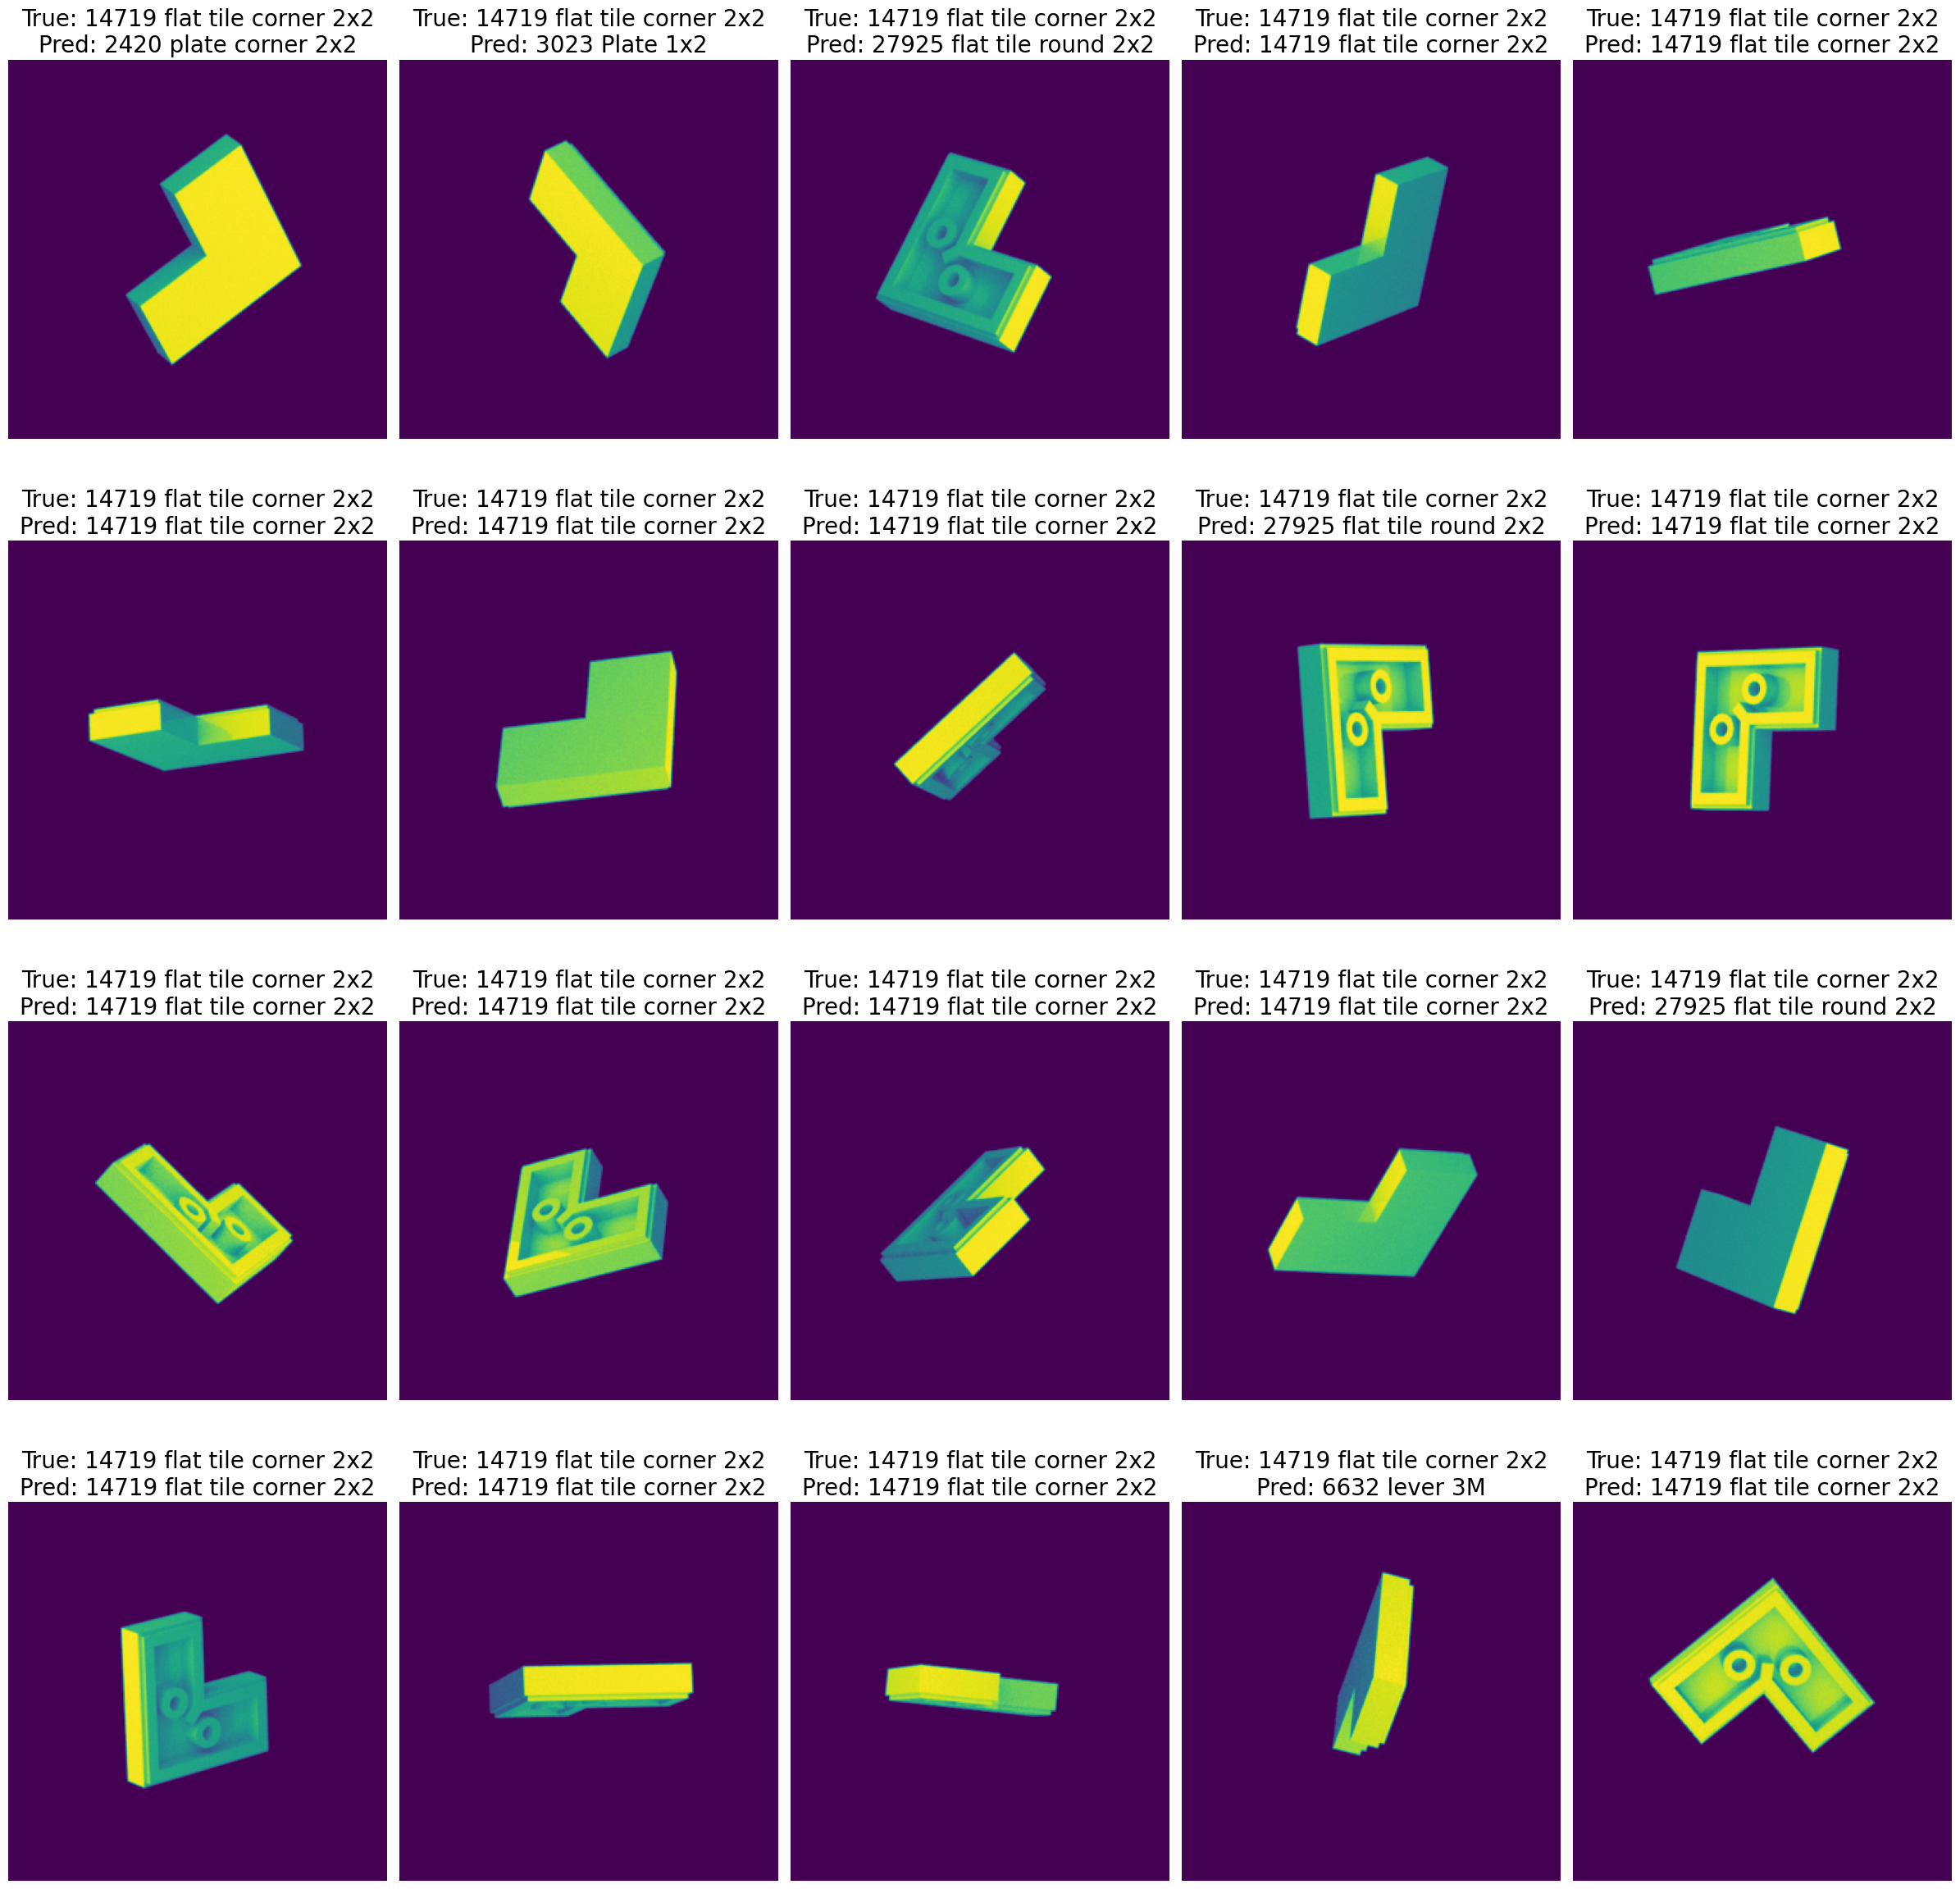

In [115]:
# Visualizziamo le immagini con le etichette vere e predette
def plot_images(images, true_labels, predicted_labels, class_names, num_images):
    plt.figure(figsize=(24, 24))
    for i in range(num_images):
        plt.subplot(4, 5, i + 1)
        plt.imshow(images[i])
        true_label = class_names[true_labels[i]]
        predicted_label = class_names[predicted_labels[i]]
        plt.title(f'True: {true_label}\nPred: {predicted_label}',fontsize=20)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_images(images, y_true, y_hat, class_labels, num_images)

In [134]:
# Funzione per caricare e preprocessare l'immagine
def load_and_preprocess_image(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Carica l'immagine in scala di grigi
    img = cv2.resize(img, (300, 300))  # Ridimensiona l'immagine a 400x400 pixel
    img = img.astype('float32') / 255.0  # Normalizza i valori dei pixel
    img = np.expand_dims(img, axis=-1)  # Aggiungi la dimensione del canale
    img = np.expand_dims(img, axis=0)  # Aggiungi la dimensione del batch
    return img


1/1 [==============================] - 0s 47ms/step


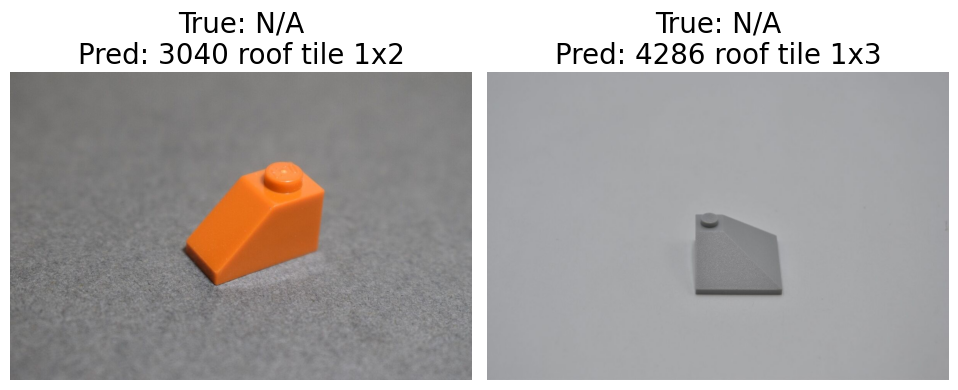

In [136]:

# Funzione per effettuare predizioni su tutte le immagini in una cartella e raccogliere risultati
def predict_on_folder(folder_path):
    images = []
    true_labels = []
    predicted_labels = []
    
    for filename in os.listdir(folder_path):
        if filename.endswith(('.jpg', '.jpeg', '.png', '.bmp')):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)  # Carica l'immagine a colori per la visualizzazione
            preprocessed_img = load_and_preprocess_image(img_path)
            
            # Predizione con il modello
            predictions = model.predict(preprocessed_img)
            predicted_class_index = np.argmax(predictions, axis=1)[0]
            
            images.append(img)
            # true_labels.append(get_true_label_somehow(filename))  # Supponiamo di avere un modo per ottenere l'etichetta vera
            predicted_labels.append(predicted_class_index)
    
    return images, true_labels, predicted_labels

# Funzione per visualizzare le immagini con le etichette vere e predette
def plot_images(images, true_labels, predicted_labels, class_names, num_images):
    plt.figure(figsize=(24, 24))
    for i in range(num_images):
        plt.subplot(4, 5, i + 1)
        img = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)  # Converti l'immagine da BGR a RGB
        plt.imshow(img)
        true_label = class_names[true_labels[i]] if true_labels else 'N/A'
        predicted_label = class_names[predicted_labels[i]]
        plt.title(f'True: {true_label}\nPred: {predicted_label}', fontsize=20)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Percorso alla cartella con le immagini
folder_path = r'C:\Users\BrunoLuciano\OneDrive - ITS Angelo Rizzoli\Documents\Deep_learning_project\img'

# Esegui le predizioni su tutte le immagini nella cartella
images, true_labels, predicted_labels = predict_on_folder(folder_path)

# Supponiamo di voler visualizzare 20 immagini
num_images_to_display = min(20, len(images))

# Visualizziamo le immagini con le etichette vere e 
plot_images(images, true_labels, predicted_labels, class_labels, num_images_to_display)